In [ ]:
import pandas as pd
import seaborn as sys

df=pd.read_csv('Admission_Predict.csv')


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape

(400, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
bi=Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])  #binarization

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [ ]:
x=df.drop('Chance of Admit ',axis=1)

In [ ]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
y=df['Chance of Admit ']

In [ ]:
y.astype('int')   # to change the datatype

,Chance of Admit
0,1
1,1
2,0
3,1
4,0
...,...
395,1
396,1
397,1
398,0


<Axes: xlabel='Chance of Admit ', ylabel='count'>

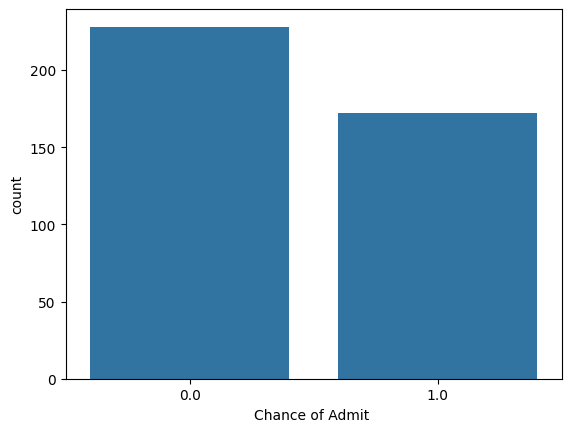

In [ ]:
sys.countplot(x=y)

In [ ]:
y.value_counts()

,count
Chance of Admit,
0.0,228
1.0,172


In [ ]:
# Cross-Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.75)

In [ ]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
130,131,339,114,5,4.0,4.5,9.76,1
187,188,335,118,5,4.5,3.5,9.44,1
23,24,334,119,5,5.0,4.5,9.70,1
43,44,332,117,4,4.5,4.0,9.10,0


In [ ]:
#import the class
from sklearn.tree import DecisionTreeClassifier  #This class is used to create a decision tree model for classification tasks.

In [ ]:
classifier=DecisionTreeClassifier(random_state=0)


In [ ]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [ ]:
result

,actual,predicted
132,0.0,1.0
309,0.0,1.0
341,1.0,0.0
196,0.0,0.0
246,0.0,0.0
...,...,...
130,1.0,1.0
187,1.0,1.0
23,1.0,1.0
43,1.0,1.0


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

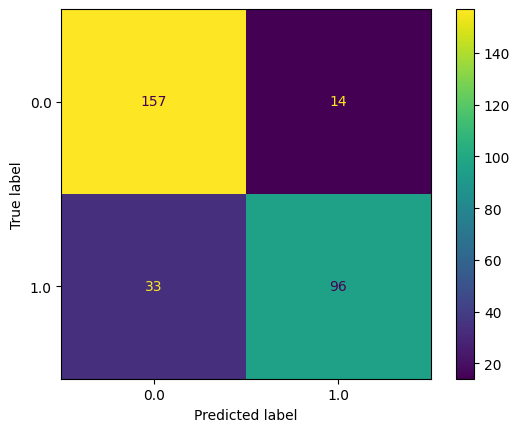

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.8433333333333334

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       171
         1.0       0.87      0.74      0.80       129

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.84      0.84       300



In [ ]:
from sklearn.tree import plot_tree


In [ ]:
import matplotlib.pyplot as plt


[Text(0.6333333333333333, 0.9375, 'x[6] <= 8.845\ngini = 0.49\nsamples = 100\nvalue = [57.0, 43.0]'),
 Text(0.4, 0.8125, 'x[3] <= 4.5\ngini = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(0.5166666666666666, 0.875, 'True  '),
 Text(0.26666666666666666, 0.6875, 'x[5] <= 4.75\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.2, 0.5625, 'x[6] <= 8.4\ngini = 0.128\nsamples = 58\nvalue = [54, 4]'),
 Text(0.13333333333333333, 0.4375, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.26666666666666666, 0.4375, 'x[1] <= 310.5\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.13333333333333333, 0.3125, 'x[1] <= 305.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06666666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.3125, 'x[5] <= 2.25\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.3333333333333333, 0.1875, 'x[0] <= 85.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text

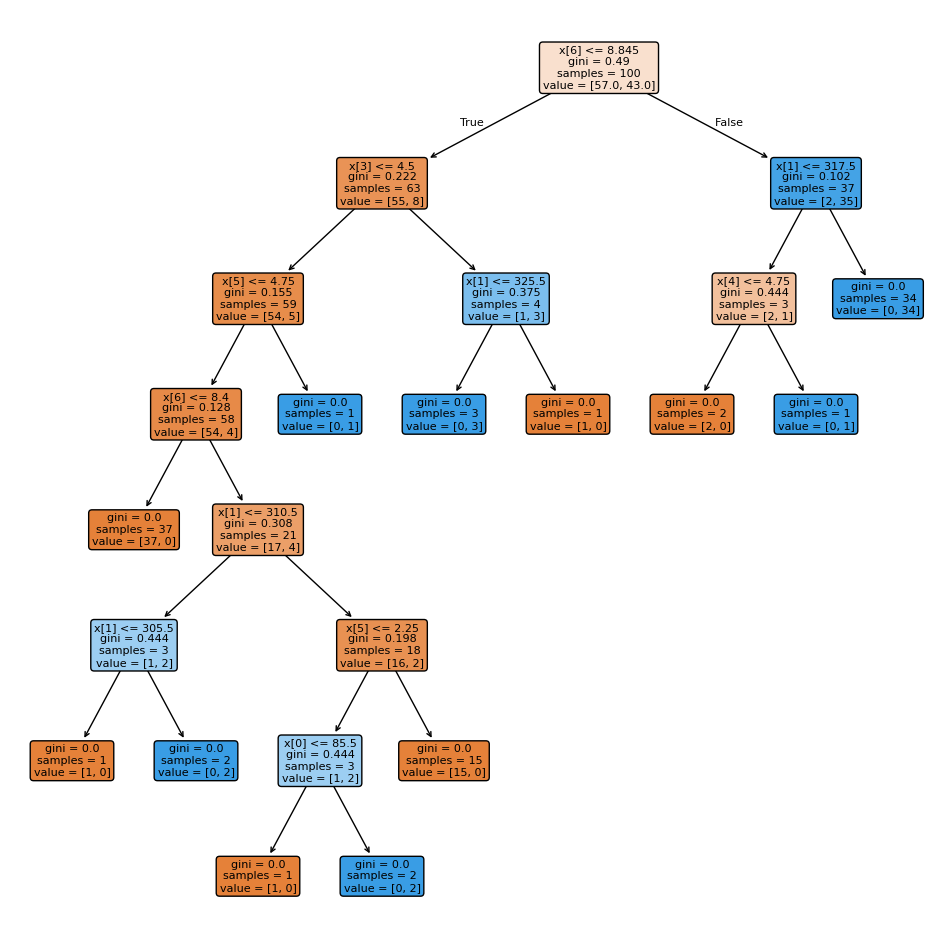

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True)